# Week 2 Exercises

## Orysya Stus
## DSE 200: Python For Data Analysis

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [42]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd

## Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [63]:
A = [[3,5,9],[3,3,4],[5,9,17]]
B = [[2],[1],[4]]

In [64]:
A = np.array(A)
B = np.array(B)
solution = np.linalg.solve(A, B)
print 'By solving the matrix equation, the solution is found to be \n', solution

By solving the matrix equation, the solution is found to be 
[[ 1.]
 [-2.]
 [ 1.]]


In [65]:
def python_multiply(a,b):
    row_a = len(a)
    col_a = len(a[0])
    row_b = len(b)
    col_b = len(b[0])
    
#    if col_a != row_b:
#        print "Incorrect dimensions considered. Check the dimensions."
#        return
    
    result = [[0 for row in range(col_b)] for col in range(row_a)]
    
    for i in range(row_a):
        for j in range(col_b):
            for k in range(col_a):
                result[i][j] += a[i][k]*b[k][j]
    print 'The resulting matrix is \n', np.array(result)
    
    
python_multiply(A,B)

The resulting matrix is 
[[47]
 [25]
 [87]]


In [66]:
def numpy_multiply(a,b):
    a = np.array(a)
    b = np.array(b)
    print 'The resulting matrix is \n', np.mat(a) * np.mat(b)

numpy_multiply(A,B)

The resulting matrix is 
[[47]
 [25]
 [87]]


In [67]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [68]:
%%cython
cimport numpy as np
import numpy as np

def cython_multiply(np.ndarray[np.float64_t, ndim=2] a, np.ndarray[np.float64_t, ndim=2] b):
    cdef np.ndarray[np.float64_t, ndim=2] result
    cdef long i, j, k
    
#    if a.shape[1] != b.shape[0]:
#        print 'Incorrect dimensions considered. Check the dimensions.'
#        return None
    
    result = np.zeros((a.shape[0], b.shape[1]))
    
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            for k in range(a.shape[1]):
                result[i, j] += a[i, k]*b[k, j]

    print 'The resulting matrix is \n', result
    return result

A_c = np.matrix('3 5 9; 3 3 4; 5 9 17', dtype=float)
B_c = np.matrix('2; 1; 4', dtype=float)
cython_multiply(A_c,B_c)    

Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

In [69]:
def performance(a,b,c):
    import numpy as np
    global A
    global B
    
    A = np.random.rand(a,b)
    B = np.random.rand(b,c)
    results = []
    
    print 'Python_multiply: '
    py = %timeit -n3 -o python_multiply(A, B)
    results.append(py.best)
    print
    print 'Numpy_multiply: '
    np = %timeit -n3 -o numpy_multiply(A, B)
    results.append(np.best)
    print
    print 'Cython_multiply: '
    cy = %timeit -n3 -o cython_multiply(A, B)
    results.append(cy.best)
    print
    
    tot_results = '{},{}, {}' .format(results[0], results[1], results[2])
    !echo $tot_results >> data_day2/'performance_multiply_results.txt'
    
    return

In [70]:
!echo "Python, Numpy, Cython" > data_day2/'performance_multiply_results.txt'

print 'Dimension 10: '
performance(10,10,10)

print 'Dimension 100: '
performance(10,100,10)

print 'Dimension 1000: '
performance(10,1000,10)

print 'Dimension 10000: '
performance(10,10000,10)

Dimension 10: 
Python_multiply: 
The resulting matrix is 
[[ 2.53578182  2.0259665   2.36283719  2.4296345   2.64663356  3.25006912
   2.17532146  2.76630378  2.49362801  1.9982159 ]
 [ 2.59816876  1.92845947  2.40330617  2.90826314  2.7183918   2.95156407
   2.47298648  2.31538101  1.8520027   1.60037935]
 [ 2.36580001  1.95841774  2.28602519  2.33671543  2.88017973  3.30514851
   2.38370255  3.04136328  2.62914754  1.72557899]
 [ 2.27186284  2.1834531   2.03365279  2.43071724  2.58076267  2.86785409
   1.80859947  2.32533152  2.42070441  1.31320956]
 [ 2.18523957  2.15360467  1.67585802  2.68644307  2.34535901  2.93078668
   2.10087506  2.12374239  1.87767825  1.13367248]
 [ 2.44481007  2.19816244  2.05565257  2.52541131  2.77386028  3.17726941
   2.11109997  2.49172662  2.541102    1.44902527]
 [ 2.73727031  1.90612457  2.28888705  2.72780085  2.86492928  3.69697568
   2.83521412  3.01765973  2.23087444  1.56605449]
 [ 2.43264344  1.81684171  1.50194972  2.37250402  2.71565318  2.99

In [71]:
perform = pd.read_csv('data_day2/performance_multiply_results.txt')
perform['Dimensions'] = ['10', '100', '1000', '10000']
perform.index = perform['Dimensions']
perform = perform.drop('Dimensions', axis=1)
perform

,Python,Numpy,Cython
Dimensions,,,
10,0.004912,0.002032,0.006896
100,0.010165,0.002050,0.002108
1000,0.097766,0.004106,0.003203
10000,0.955313,0.003041,0.006674


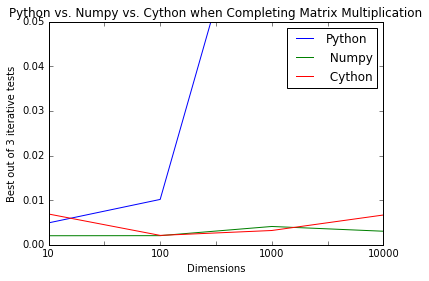

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

plot = perform.plot(title='Python vs. Numpy vs. Cython when Completing Matrix Multiplication')
plot.set_ylim(0,0.05)
plot.set_xlabel("Dimensions")
plot.set_ylabel("Best out of 3 iterative tests")

#plot = plt.semilogx(perform)
#can use semilogx to view logarithmic growth from 10->100 dimensions

### Numpy matrix multiplication performs faster than Python or Cython
From the performance analysis listed above, it can be seen than as matrix dimensions increase, the computation time of numpy remains the lowest. Numpy is built using optimized C code, which allows for a certain amount of overhead in each call and this overhead becomes less significant if each operation deals with large arrays. 

In [30]:
#used for troubleshooting, ignore for grading
#def matrix(a,b,c):
#    mat_A = np.random.choice([x for x in xrange(0,1)], a*b)
#    mat_A.resize(a, b)
    
#    mat_B = np.random.choice([x for x in xrange(0,1)], b*c)
#    mat_B.resize(b,c)

In [52]:
#to find total amount of permutation when dims = [10,100,1000,10000]
from itertools import permutations

def measure(dimension_list, size):
    combos = []
    for i in permutations(dimension_list, size):
        combos.append(i)

    print combos
        

dims = [10,100,1000,10000]

print 'All potential permutations of the above list \n', measure(dims, 3)

All potential permutations of the above list 
[(10, 100, 1000), (10, 100, 10000), (10, 1000, 100), (10, 1000, 10000), (10, 10000, 100), (10, 10000, 1000), (100, 10, 1000), (100, 10, 10000), (100, 1000, 10), (100, 1000, 10000), (100, 10000, 10), (100, 10000, 1000), (1000, 10, 100), (1000, 10, 10000), (1000, 100, 10), (1000, 100, 10000), (1000, 10000, 10), (1000, 10000, 100), (10000, 10, 100), (10000, 10, 1000), (10000, 100, 10), (10000, 100, 1000), (10000, 1000, 10), (10000, 1000, 100)]
None


In [53]:
#used for troubleshooting, ignore for grading
#from itertools import permutations

#def measure(dimension_list, size):
#    combos = []
#    for i in permutations(dimension_list, size):
#    #How do I generate permutations of length LEN given a list of N Items?
#        combos.append(i)

#    for i in combos:
#        print performance(i[0],i[1],i[2])
        

#dims = [10,100,1000,10000]

#measure(dims, 3)

**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

In [73]:
def python_det(l):
    n=len(l)
    if (n>2):
        i=1
        t=0
        sum=0
        while t<=n-1:
            d={}
            t1=1
            while t1<=n-1:
                m=0
                d[t1]=[]
                while m<=n-1:
                    if (m==t):
                        u=0
                    else:
                        d[t1].append(l[t1][m])
                    m+=1
                t1+=1
            l1=[d[x] for x in d]
            sum=sum+i*(l[0][t])*(python_det(l1))
            i=i*(-1)
            t+=1
        return sum
    else:
        return (l[0][0]*l[1][1]-l[0][1]*l[1][0])

In [74]:
def numpy_det(K):
    #K = np.array(K)
    return np.linalg.det(K)

In [75]:
def performance_determinant(n):
    import random
    global matrix
    
    matrix = []
    for i in range(n):
        A = random.sample(range(10), n)
        matrix.append(A)

    results = []
        
    print 'Using Python: '
    py = %timeit -n3 -o python_det(matrix)
    results.append(py.best)
    print
    
    print 'Using Numpy: '
    np = %timeit -n3 -o numpy_det(matrix)
    results.append(np.best)
    print
    
    tot_results = '{},{}' .format(results[0], results[1])
    !echo $tot_results >> data_day2/'performance_determinants_results.txt'
    
    return

In [76]:
!echo "Python, Numpy" > data_day2/'performance_determinants_results.txt'

print 'Dimension 2: '
performance_determinant(2)

print 'Dimension 4: '
performance_determinant(4)

print 'Dimension 6: '
performance_determinant(6)

print 'Dimension 8: '
performance_determinant(8)

print 'Dimension 10: '
performance_determinant(10)

Dimension 2: 
Using Python: 
The slowest run took 4.41 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 1.35 µs per loop

Using Numpy: 
The slowest run took 699.23 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 45.9 µs per loop

Dimension 4: 
Using Python: 
3 loops, best of 3: 50.6 µs per loop

Using Numpy: 
The slowest run took 292.49 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 19 µs per loop

Dimension 6: 
Using Python: 
3 loops, best of 3: 5.68 ms per loop

Using Numpy: 
3 loops, best of 3: 32.7 µs per loop

Dimension 8: 
Using Python: 
3 loops, best of 3: 87 ms per loop

Using Numpy: 
3 loops, best of 3: 21.4 µs per loop

Dimension 10: 
Using Python: 
3 loops, best of 3: 9.18 s per loop

Using Numpy: 
3 loops, best of 3: 23.6 µs per loop



In [77]:
perform = pd.read_csv('data_day2/performance_determinants_results.txt')
perform['Dimensions'] = ['2', '4', '6', '8', '10']
perform.index = perform['Dimensions']
perform = perform.drop('Dimensions', axis=1)
perform

,Python,Numpy
Dimensions,,
2,0.000001,0.000046
4,0.000051,0.000019
6,0.005682,0.000033
8,0.086973,0.000021
10,9.182434,0.000024


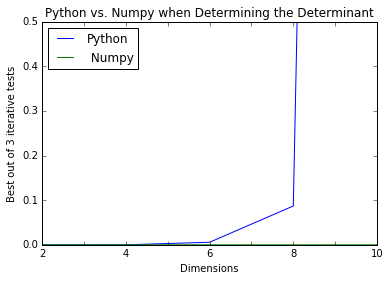

In [79]:
%matplotlib inline
#import matplotlib.pyplot as plt

plot = perform.plot(title='Python vs. Numpy when Determining the Determinant')
plot.set_ylim(0,0.5)
plot.set_xlabel("Dimensions")
plot.set_ylabel("Best out of 3 iterative tests")

### It is shown again thaat numpy outperforms native python for the above calculations

### IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]

1. set
2. tuple

Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [54]:
import pickle
import json
import gzip

datatypes = {'object': 'dictionary', 'array':'list', 'string':'string', 'integer': 'integer', 'realnumber':'float', 'true':'True', 'false':'False', 'null':'None'}

pickle.dump(datatypes, gzip.open('datatypeszip.pkl', 'wb'))
data = pickle.load(gzip.open('datatypeszip.pkl', 'rb'))
datajson = {}

for key, value in data.items():
    print 'The JSON equivalent for the Python datatype %s is %s' % (value, key)
    datajson[value] = key

datajson
json.dump(datajson, gzip.open('datatypeszip.jsn', 'wb'))

The JSON equivalent for the Python datatype False is false
The JSON equivalent for the Python datatype string is string
The JSON equivalent for the Python datatype dictionary is object
The JSON equivalent for the Python datatype integer is integer
The JSON equivalent for the Python datatype list is array
The JSON equivalent for the Python datatype None is null
The JSON equivalent for the Python datatype True is true
The JSON equivalent for the Python datatype float is realnumber


## Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


### Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [2]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

In [3]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98doc.txt

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

    INFORMATION LISTED BELOW IS AVAILABLE UNDER THE TERMS OF THE  
                      CONFIDENTIALITY AGREEMENT                

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

+--------------------------------------------------------------------+
|                   DOCUMENTATION TO ACCOMPANY                       |
|                                                                    |
|                          KDD-CUP-98                                |
|                                                                    |
|          The Second International Knowledge Discovery and          |
|                 Data Mining Tools Competition                      |
|                                                                    |
|                Held in Conjunction with KDD-98                     |
|                                                                    |
|          The

In [4]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt



EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

    INFORMATION LISTED BELOW IS AVAILABLE UNDER THE TERMS OF THE  
                      CONFIDENTIALITY AGREEMENT                

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

+--------------------------------------------------------------------+
|                PARALYZED VETERANS OF AMERICA (PVA)                 |
|                  DATA DICTIONARY TO ACCOMPANY                      |
|                                                                    |
|                          KDD-CUP-98                                |
|                                                                    |
|          The Second International Knowledge Discovery and          |
|                 Data Mining Tools Competition                      |
|                                                                    |
|                Held in Conjunction with KDD-98                     |
|           

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [17]:
#!mkdir data_day2

In [56]:
!ls

00_git.slides					    Calit2.txt
01_IO.ipynb					    data_day2
025_Memory_hierarchy.slides			    datatypeszip.jsn
02_measuring_performance_of_memory_hierarchy.ipynb  datatypeszip.pkl
03_numpy_vs_native.ipynb			    dict.dat
04_learn-pandas					    diff
10_exercises.ipynb				    GitHub_Review.ipynb
BlockData1					    Memory_Hierarchy.ipynb


In [25]:
#!wget -P data_day2/ "http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip"

#!unzip data_day2/cup98lrn.zip
#%cd ..
#!mv cup98LRN.txt data_day2/
#!git status

--2016-10-26 14:51:26--  http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.95
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36468735 (35M) [application/zip]
Saving to: ‘data_day2/cup98lrn.zip’

cup98lrn.zip        100%[===================>]  34.78M  7.25MB/s    in 4.1s    

2016-10-26 14:51:31 (8.49 MB/s) - ‘data_day2/cup98lrn.zip’ saved [36468735/36468735]

Archive:  data_day2/cup98lrn.zip
  inflating: cup98LRN.txt            
On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   10_exercises.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	data_day2/

no changes added to commit (use "git add

### Resulting output:

--2016-10-26 14:51:26--  http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.95
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36468735 (35M) [application/zip]
Saving to: ‘data_day2/cup98lrn.zip’

cup98lrn.zip        100%[===================>]  34.78M  7.25MB/s    in 4.1s    

2016-10-26 14:51:31 (8.49 MB/s) - ‘data_day2/cup98lrn.zip’ saved [36468735/36468735]

Archive:  data_day2/cup98lrn.zip
  inflating: cup98LRN.txt            
On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   10_exercises.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	data_day2/

no changes added to commit (use "git add" and/or "git commit -a")



Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [2]:
%cd data_day2/
!pwd

/home/orysya/Documents/DSE/ostus/DSE200/day_2_github_io_numpy_pandas/data_day2
/home/orysya/Documents/DSE/ostus/DSE200/day_2_github_io_numpy_pandas/data_day2


In [3]:
#1 How many lines are there? 
ln_count=!wc -l cup98LRN.txt | cut -d ' ' -f 1
print ln_count[0]


#2 Is the file character seperated or fixed width format?
infile = open('cup98LRN.txt', 'r')
first_line_length = None
fixed_width_file = True
for line in infile.readlines():
    if not first_line_length:
        first_line_length = len(line)
    elif first_line_length != len(line):
        print "File is not in a fixed width format, but a character separated file\n"
        fixed_width_file = False
        break
infile.close()
if fixed_width_file:
    print "File is in a fixed width format\n"


#3 Is there a header? If so how many fields are in it?
!head -n 2 cup98LRN.txt

#4 Do all rows have the same number of fields as the header?
infile = open('cup98LRN.txt', 'r')
count = None
malformed_line_count = 0
for line in infile.readlines():
    current_line_count = len(line.split(','))
    if not count:
        count = current_line_count
    elif current_line_count != count:
        malformed_line_count += 1
if malformed_line_count == 0:
    print "\n Yes, all lines are equal"
else:
    print "\n No, all lines are not equal"
infile.close()

# remove null bytes from the file
!sed -i 's/[\x0]//g' cup98LRN.txt

95413
File is not in a fixed width format, but a character separated file

ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MAR

Give answers to questions 1-4 in this markdown cell:

1. 95413 lines exist
2. The file is not a fixed width format file, but it is a character separated file
3. Yes there are many headers for the file. 481 in total.
4. Yes, all lines are equal
5. The data above and the data in the ReadMe agree. The only difference is that the data records above found 95413 lines in the .txt file, while the ReadMe lists 95412 lines (but that might just depend on how the count occured). 

Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [57]:
%cd ..
!ls -a

/home/orysya/Documents/DSE/ostus/DSE200/day_2_github_io_numpy_pandas
.						    Calit2.txt
..						    data_day2
00_git.slides					    datatypeszip.jsn
01_IO.ipynb					    datatypeszip.pkl
025_Memory_hierarchy.slides			    dict.dat
02_measuring_performance_of_memory_hierarchy.ipynb  diff
03_numpy_vs_native.ipynb			    GitHub_Review.ipynb
04_learn-pandas					    .gitignore
10_exercises.ipynb				    .ipynb_checkpoints
BlockData1					    Memory_Hierarchy.ipynb


In [58]:
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

In [61]:
learn =pd.DataFrame(col_types, columns=['Head', 'Type'])
dict_file.close()
learn_x=learn[learn['Head'].isin(['TARGET_B', 'TARGET_D'])]
learn_y=learn[np.logical_not(learn['Head'].isin(['TARGET_B', 'TARGET_D']))]
print learn
print learn.shape
print learn_x
print learn_x.shape
print learn_y
print learn_y.shape

         Head  Type
0     ODATEDW   Num
1     OSOURCE  Char
2       TCODE   Num
3       STATE  Char
4         ZIP  Char
5    MAILCODE  Char
6    PVASTATE  Char
7         DOB   Num
8      NOEXCH  Char
9    RECINHSE  Char
10      RECP3  Char
11    RECPGVG  Char
12   RECSWEEP  Char
13     MDMAUD  Char
14     DOMAIN  Char
15    CLUSTER  Char
16        AGE   Num
17    AGEFLAG  Char
18   HOMEOWNR  Char
19    CHILD03  Char
20    CHILD07  Char
21    CHILD12  Char
22    CHILD18  Char
23    NUMCHLD   Num
24     INCOME   Num
25     GENDER  Char
26    WEALTH1   Num
27        HIT   Num
28    MBCRAFT   Num
29   MBGARDEN   Num
..        ...   ...
451  RAMNT_20   Num
452  RAMNT_21   Num
453  RAMNT_22   Num
454  RAMNT_23   Num
455  RAMNT_24   Num
456  RAMNTALL   Num
457  NGIFTALL   Num
458  CARDGIFT   Num
459  MINRAMNT   Num
460  MINRDATE   Num
461  MAXRAMNT   Num
462  MAXRDATE   Num
463  LASTGIFT   Num
464  LASTDATE   Num
465  FISTDATE   Num
466  NEXTDATE   Num
467   TIMELAG   Num
468   AVGGIFT   Num


### Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non numeric:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [9]:
 def summary(df):
    numeric = df._get_numeric_data()
    mean_result = df.mean(numeric_only=True)
    std_dev_result = df.std(numeric_only=True)
    min_result = df.min(numeric_only=True)
    max_result = df.max(numeric_only=True)
    
    for field in df:
        print field
        if field in numeric:
            print "mean: %d" % mean_result[field]
            print "std_dev: %d" % std_dev_result[field]
            print "min: %d" % min_result[field]
            print "max: %d" % max_result[field]
            print "missing: %d" % (np.isinf(df[field]) | df[field].isnull()).sum()
        else:
            print "distinct_values: %d" % df[field].nunique()
            print "missing: %d\n" % (df[field].apply(lambda x: x == np.inf or x == -np.inf or str(x).strip() == '') | df[field].isnull()).sum()
            print "3 most common:"
            cleaned_data = df.dropna(subset=[field])
            value_counts = cleaned_data[field].value_counts()
            print value_counts.head(3)
            print "\n 3 least common:"
            print value_counts.tail(3)
        print ""

summary(learn)

Head
distinct_values: 481
missing: 0

3 most common:
MBCRAFT    1
OCC12      1
OEDC1      1
Name: Head, dtype: int64

 3 least common:
OEDC3       1
RDATE_7     1
RAMNT_15    1
Name: Head, dtype: int64

Type
distinct_values: 2
missing: 0

3 most common:
Num     406
Char     75
Name: Type, dtype: int64

 3 least common:
Num     406
Char     75
Name: Type, dtype: int64



 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data > Calit2.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   689k      0 --:--:-- --:--:-- --:--:-- 1080k


In [3]:
!cat Calit2.txt

7,07/24/05,00:00:00,0
9,07/24/05,00:00:00,0
7,07/24/05,00:30:00,1
9,07/24/05,00:30:00,0
7,07/24/05,01:00:00,0
9,07/24/05,01:00:00,0
7,07/24/05,01:30:00,0
9,07/24/05,01:30:00,0
7,07/24/05,02:00:00,0
9,07/24/05,02:00:00,0
7,07/24/05,02:30:00,2
9,07/24/05,02:30:00,0
7,07/24/05,03:00:00,0
9,07/24/05,03:00:00,0
7,07/24/05,03:30:00,0
9,07/24/05,03:30:00,0
7,07/24/05,04:00:00,0
9,07/24/05,04:00:00,0
7,07/24/05,04:30:00,0
9,07/24/05,04:30:00,0
7,07/24/05,05:00:00,0
9,07/24/05,05:00:00,0
7,07/24/05,05:30:00,0
9,07/24/05,05:30:00,0
7,07/24/05,06:00:00,0
9,07/24/05,06:00:00,0
7,07/24/05,06:30:00,0
9,07/24/05,06:30:00,0
7,07/24/05,07:00:00,0
9,07/24/05,07:00:00,0
7,07/24/05,07:30:00,2
9,07/24/05,07:30:00,3
7,07/24/05,08:00:00,0
9,07/24/05,08:00:00,0
7,07/24/05,08:30:00,0
9,07/24/05,08:30:00,0
7,07/24/05,09:00:00,0
9,07/24/05,09:00:00,1
7,07/24/05,09:30:00,1
9,07/24/05,09:30:00,1
7,07/24/05,10:00:00,0
9,07/24/05,10:00:00,0
7,07/24/05,10:30:00,0
9,07/24/05,10:30:00,0
7,07/24/05,11:00:00,1
9,07/24/05

In [4]:
!pwd

/home/orysya/Documents/DSE/DSE200-notebooks/day_2_github_io_numpy_pandas


In [4]:
data = pd.read_csv('/home/orysya/Documents/DSE/DSE200-notebooks/day_2_github_io_numpy_pandas/Calit2.txt', header = None)
#C:/Users/Orysya/Documents/DSE/DSE200-notebooks/day_2_github_io_numpy_pandas//Calit2.txt'
data.columns=['Flow', 'Date', 'Time', 'Count']
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Flow,Date,Time,Count
0,7,2005-07-24,00:00:00,0
1,9,2005-07-24,00:00:00,0
2,7,2005-07-24,00:30:00,1
3,9,2005-07-24,00:30:00,0
4,7,2005-07-24,01:00:00,0


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [6]:
#for 1:
date = data['Date'].isin(['07/24/05'])
flow_7 = data['Flow'] == 7
output = data[date & flow_7]
output

,Flow,Date,Time,Count
0,7,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
4,7,07/24/05,01:00:00,0
6,7,07/24/05,01:30:00,0
8,7,07/24/05,02:00:00,0
10,7,07/24/05,02:30:00,2
12,7,07/24/05,03:00:00,0
14,7,07/24/05,03:30:00,0
16,7,07/24/05,04:00:00,0
18,7,07/24/05,04:30:00,0


In [7]:
print len(output.index)

48


In [11]:
#for 2:
count_5 = data[data['Count'] > 5]
count_5 = count_5.sort_values(by='Count', ascending=False)
top10 = count_5.head(10)
top10

,Flow,Date,Time,Count
6879,9,10/03/05,15:30:00,62
335,9,07/27/05,11:30:00,61
6881,9,10/03/05,16:00:00,55
9686,7,11/01/05,21:30:00,54
9682,7,11/01/05,20:30:00,54
9681,9,11/01/05,20:00:00,53
6878,7,10/03/05,15:30:00,52
9933,9,11/04/05,11:00:00,50
8913,9,10/24/05,20:00:00,50
3615,9,08/30/05,15:30:00,50


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [12]:
#for 1:
print (top10['Count'].apply(lambda x: x-min(top10['Count']))).mean()
top10['Adjusted_average'] = (top10['Count'].apply(lambda x: x-min(top10['Count']))).mean()
top10

4.1


/home/orysya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Flow,Date,Time,Count,Adjusted_average
6879,9,10/03/05,15:30:00,62,4.1
335,9,07/27/05,11:30:00,61,4.1
6881,9,10/03/05,16:00:00,55,4.1
9686,7,11/01/05,21:30:00,54,4.1
9682,7,11/01/05,20:30:00,54,4.1
9681,9,11/01/05,20:00:00,53,4.1
6878,7,10/03/05,15:30:00,52,4.1
9933,9,11/04/05,11:00:00,50,4.1
8913,9,10/24/05,20:00:00,50,4.1
3615,9,08/30/05,15:30:00,50,4.1


In [13]:
#for 2:
flow_9 = data['Flow'] == 9
date = data['Date'].isin(['07/24/05'])
new = data[flow_9 & date]
print new.apply(np.sum)['Count']

16


#### Indexing an Selecting ####
Explain the following

1. loc: returns the following indexes df.loc[inclusive:inclusive]; only works on index
2. iloc: returns the following indexes df.iloc[inclusive:exclusive] and should only be used to refer to indexes as positions; only works on position
3. ix: can retrieve data from a dataframe without it being in the index
4. at: can retrieve scalar values, it works as a fast loc
5. iat: can retrieve scalar values, it works as a fast iloc

Highlight the differences by providing usecases where one is more useful than the other


Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [14]:
start = raw_input("Input start date - yyyy-mm-dd: ")
end = raw_input("Input end data - yyyy-mm-dd: ")
    
def dates(start, end):
    #data1['Date'] = pd.to_datetime(data1['Date']) -> no need to run this since the same code was specified above
    data1 = data.set_index('Date')
    return data1.loc[start : end]

dates(start, end)

Input start date - yyyy-mm-dd: 2005-07-24
Input end data - yyyy-mm-dd: 2005-07-25


,Flow,Time,Count
Date,,,
2005-07-24,7,00:00:00,0
2005-07-24,9,00:00:00,0
2005-07-24,7,00:30:00,1
2005-07-24,9,00:30:00,0
2005-07-24,7,01:00:00,0
2005-07-24,9,01:00:00,0
2005-07-24,7,01:30:00,0
2005-07-24,9,01:30:00,0
2005-07-24,7,02:00:00,0


#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [27]:
august = data[data['Date'].apply(lambda x: x.strftime('%B-%Y')) == 'August-2005']
group = august[august['Flow'] == 7]
group

,Flow,Date,Time,Count
768,7,2005-08-01,00:00:00,1
770,7,2005-08-01,00:30:00,0
772,7,2005-08-01,01:00:00,0
774,7,2005-08-01,01:30:00,0
776,7,2005-08-01,02:00:00,0
778,7,2005-08-01,02:30:00,0
780,7,2005-08-01,03:00:00,0
782,7,2005-08-01,03:30:00,0
784,7,2005-08-01,04:00:00,0
786,7,2005-08-01,04:30:00,0


In [123]:
A = group.groupby('Date')
A.apply(np.max)['Count']

#A.apply(np.sum)['Count'] can also work if wanted the sum maximum of Count per date as opposed to maximum Count per day accordingly to the time slot
#check if this data is correct or not; try sum -> sum()

Date
2005-08-01    18
2005-08-02    16
2005-08-03    26
2005-08-04    40
2005-08-05    17
2005-08-06     8
2005-08-07     3
2005-08-08    16
2005-08-09    19
2005-08-10    25
2005-08-11    16
2005-08-12    21
2005-08-13     5
2005-08-14     3
2005-08-15    17
2005-08-16    24
2005-08-17    22
2005-08-18    39
2005-08-19    23
2005-08-20     3
2005-08-21     4
2005-08-22    23
2005-08-23    25
2005-08-24    17
2005-08-25    24
2005-08-26    22
2005-08-27     3
2005-08-28     7
2005-08-29    15
2005-08-30    47
2005-08-31    19
Name: Count, dtype: int64

#### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [51]:
#for 1:
stack1 = data.set_index(['Count', 'Flow']).stack()
print stack1.head()

#for 2:
stack2 = stack1.reset_index(level=1)
print stack2.head()

Count  Flow      
0      7     Date   2005-07-24
             Time   2016-10-26
       9     Date   2005-07-24
             Time   2016-10-26
1      7     Date   2005-07-24
dtype: datetime64[ns]
            Flow          0
Count                      
0     Date     7 2005-07-24
      Time     7 2016-10-26
      Date     9 2005-07-24
      Time     9 2016-10-26
1     Date     7 2005-07-24


In [52]:
#for 3:
stack3 = stack2.T
stack3 = stack3.unstack()
print stack3.head()

Count            
0      Date  Flow                      7
             0       2005-07-24 00:00:00
       Time  Flow                      7
             0       2016-10-26 00:00:00
       Date  Flow                      9
dtype: object


In [53]:
data.head()

,Flow,Date,Time,Count
0,7,2005-07-24,00:00:00,0
1,9,2005-07-24,00:00:00,0
2,7,2005-07-24,00:30:00,1
3,9,2005-07-24,00:30:00,0
4,7,2005-07-24,01:00:00,0


#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

In [15]:
%matplotlib inline
july = data[data['Date'].apply(lambda x: x.strftime('%B-%Y')) == 'July-2005']

Flow          7    9
Date                
2005-07-24   25   16
2005-07-25  162  176
2005-07-26  220  217
2005-07-27  230  247
2005-07-28  244  271
2005-07-29  220  233
2005-07-30   15    9
2005-07-31   24    9


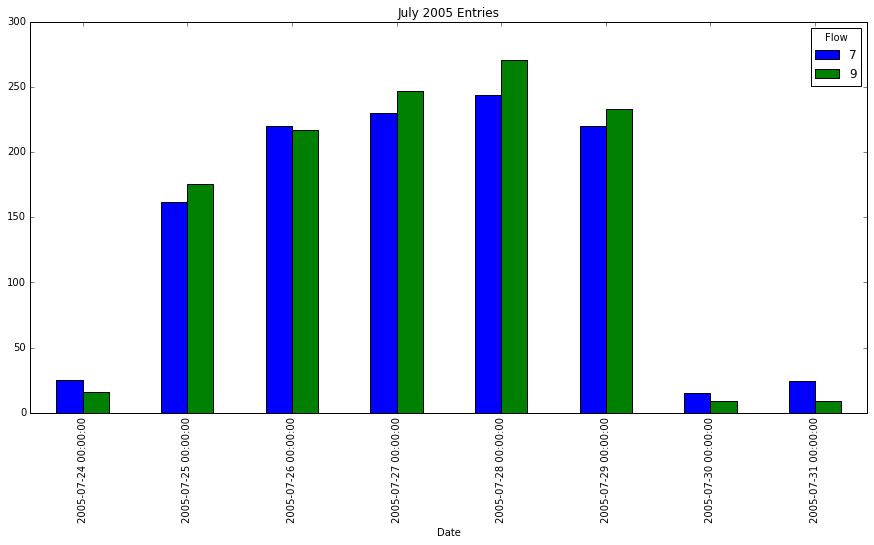

In [20]:
B = july.groupby(['Date', 'Flow'])['Count'].sum().unstack()
ax = B.plot(kind='bar',stacked=False,figsize=(15, 7),title='July 2005 Entries')

print B